In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import scipy.stats as sps
plt.style.use('seaborn-darkgrid')


<ipython-input-16-2eb752261386>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [110]:
start_date = datetime(2021, 1, 1)
end_date = datetime(2021, 12, 31)

# get the data
amd = yf.download('AMD', start = start_date,     end = end_date)['Adj Close']
log_amd = pd.Series(np.diff(np.log(amd)))
#log_amd.head()

amd.describe()

[*********************100%%**********************]  1 of 1 completed


count    251.000000
mean     100.975538
std       23.300485
min       73.089996
25%       82.309998
50%       92.150002
75%      109.954998
max      161.910004
Name: Adj Close, dtype: float64

In [69]:
#Current price / first record (e.g. price at beginning of 2009)
#provides us with the total growth %

total_growth = (amd[-1] / amd[1])
time_elapsed = (amd.index[-1] - amd.index[0]).days
#Next, we want to annualize this percentage
#First, we convert our time elapsed to the # of years elapsed
number_of_years = time_elapsed / 365.0
#Second, we can raise the total growth to the inverse of the # of years
#(e.g. ~1/10 at time of writing) to annualize our growth rate
cagr = total_growth ** (1/number_of_years) - 1

std_dev = log_amd.std()

number_of_trading_days = 252
std_dev = std_dev * np.sqrt(number_of_trading_days)

#From here, we have our two inputs needed to generate random
#values in our simulation
print ("cagr (mean returns) : ", str(round(cagr,4)))
print ("std_dev (standard deviation of return : )", str(round(std_dev,4)))

cagr (mean returns) :  0.2768
std_dev (standard deviation of return : ) 0.5063


In [70]:
t_para = sps.t.fit(log_amd)
x = np.linspace(np.min(log_amd),np.max(log_amd), 1000)
fit_t = sps.t.pdf(x, t_para[0], t_para[1], t_para[2])
n_par = sps.norm.fit(log_amd)
fit_no = sps.norm.pdf(x,n_par[0],n_par[1])


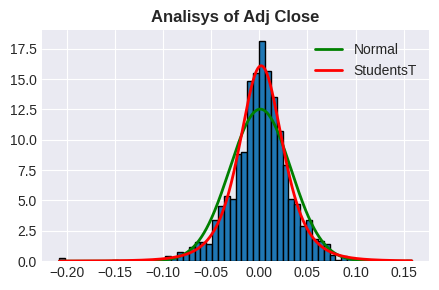

In [71]:
plt.figure(figsize=(5, 3))
plt.title(f'Analisys of {amd.name}', fontweight='bold')
plt.hist(log_amd, bins='fd', density = True, edgecolor = 'black')
plt.plot(x, fit_no, linewidth=2, label='Normal', color='green')
plt.plot(x,fit_t, linewidth=2, label='StudentsT', color='red')
plt.legend()
plt.show()

In [72]:
## Statistiche
print(f'Mediana: {log_amd.median()}',f'Media:  {log_amd.mean()}', f'Asimetria:  {log_amd.skew()}')

Mediana: 0.0023329076112981184 Media:  0.0009500858512820481 Asimetria:  -0.5591969526306918


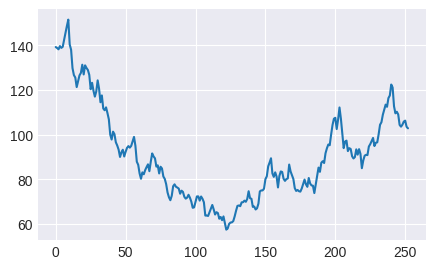

In [73]:
#Generate random values for 1 year's worth of trading (252 days),
#using numpy and assuming a normal distribution
daily_return_percentages = np.random.normal(cagr/number_of_trading_days, std_dev/np.sqrt(number_of_trading_days),
                                            number_of_trading_days)+1

#Now that we have created a random series of future
#daily return %s, we can simply apply these forward-looking
#to our last stock price in the window, effectively carrying forward
#a price prediction for the next year

#This distribution is known as a 'random walk'

price_series = [amd[-1]]

for j in daily_return_percentages:
    price_series.append(price_series[-1] * j)

#Great, now we can plot of single 'random walk' of stock prices
plt.figure(figsize=(5, 3))
plt.plot(price_series)
plt.show()

[109.44999694824219]

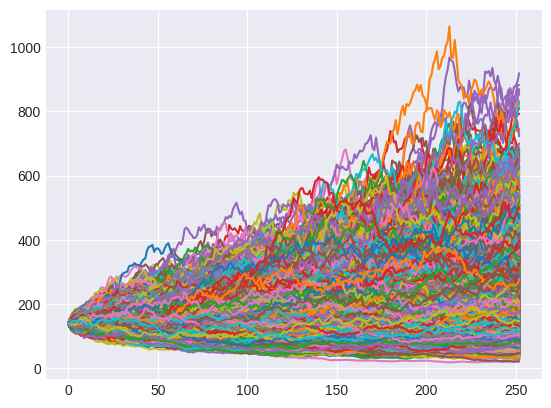

In [74]:
#Now that we've created a single random walk above,
#we can simulate this process over a large sample size to
#get a better sense of the true expected distribution
number_of_trials = 10000

#set up an additional array to collect all possible
#closing prices in last day of window.
#We can toss this into a histogram
#to get a clearer sense of possible outcomes
closing_prices = []

for i in range(number_of_trials):
    #calculate randomized return percentages following our normal distribution
    #and using the mean / std dev we calculated above
    daily_return_percentages = np.random.normal(cagr/number_of_trading_days, std_dev/np.sqrt(number_of_trading_days),
                                                number_of_trading_days)+1
    price_series = [amd[-1]]

    for j in daily_return_percentages:
        #extrapolate price out for next year
        price_series.append(price_series[-1] * j)

    #append closing prices in last day of window for histogram
    closing_prices.append(price_series[-1])

    #plot all random walks

    plt.plot(price_series)

plt.show()


In [75]:
mean_end_price = round(np.mean(closing_prices),2)
print("Expected price: ", str(mean_end_price))

Expected price:  184.11


In [77]:
amd[-1]

139.25489807128906

MC Simulation - T Student

In [101]:
def stock_valuation(ticker, start_date, end_date, number_MC_Simulation):
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  import yfinance as yf
  from datetime import datetime
  import scipy.stats as sps
  plt.style.use('seaborn-darkgrid')


  start_date = datetime(int(start_date[:4]),
                        int(start_date[6]),
                        int(start_date[9]))
  end_date = datetime(int(end_date[:4]),
                      int(end_date[6]),
                      int(end_date[9]))

  # get the data
  print(f'Getting the data for {ticker}')
  amd = yf.download(str(f'{ticker}'), start = start_date,  end = end_date)['Adj Close']
  log_amd = pd.Series(np.diff(np.log(amd)))

  #Current price / first record (e.g. price at beginning of 2009)
  #provides us with the total growth %

  total_growth = (amd[-1] / amd[1])
  time_elapsed = (amd.index[-1] - amd.index[0]).days
  #Next, we want to annualize this percentage
  #First, we convert our time elapsed to the # of years elapsed
  number_of_years = time_elapsed / 365.0
  #Second, we can raise the total growth to the inverse of the # of years
  #(e.g. ~1/10 at time of writing) to annualize our growth rate
  cagr = total_growth ** (1/number_of_years) - 1

  std_dev = log_amd.std()

  number_of_trading_days = 252
  std_dev = std_dev * np.sqrt(number_of_trading_days)

  #From here, we have our two inputs needed to generate random
  #values in our simulation
  print ("cagr (mean returns) : ", str(round(cagr,4)))
  print ("std_dev (standard deviation of return : )", str(round(std_dev,4)))

  #à Fiting distribution
  t_para = sps.t.fit(log_amd)
  x = np.linspace(np.min(log_amd),np.max(log_amd), 1000)
  fit_t = sps.t.pdf(x, t_para[0], t_para[1], t_para[2])
  n_par = sps.norm.fit(log_amd)
  fit_no = sps.norm.pdf(x,n_par[0],n_par[1])

    ## Statistiche
  print(f'Mediana: {log_amd.median()}',f'Media:  {log_amd.mean()}', f'Asimetria:  {log_amd.skew()}')

  # Distribution for the stock
  plt.figure(figsize=(5, 3))
  plt.title(f'Analisys of {amd.name}', fontweight='bold')
  plt.hist(log_amd, bins='fd', density = True, edgecolor = 'black')
  plt.plot(x, fit_no, linewidth=2, label='Normal', color='green')
  plt.plot(x,fit_t, linewidth=2, label='StudentsT', color='red')
  plt.legend()
  plt.show()

  #Now that we've created a single random walk above,
  #we can simulate this process over a large sample size to
  #get a better sense of the true expected distribution
  number_of_trials = number_MC_Simulation

  #set up an additional array to collect all possible
  #closing prices in last day of window.
  #We can toss this into a histogram
  #to get a clearer sense of possible outcomes
  closing_prices = []

  for i in range(number_of_trials):
      #calculate randomized return percentages following our normal distribution
      #and using the mean / std dev we calculated above
      daily_return_percentages = np.random.normal(cagr/number_of_trading_days, std_dev/np.sqrt(number_of_trading_days),
                                                  number_of_trading_days)+1
      price_series = [amd[-1]]

      for j in daily_return_percentages:
          #extrapolate price out for next year
          price_series.append(price_series[-1] * j)

      #append closing prices in last day of window for histogram
      closing_prices.append(price_series[-1])

      #plot all random walks

      plt.plot(price_series)

  plt.show()

  mean_end_price = round(np.mean(closing_prices),2)
  print("Expected price: ", str(mean_end_price))

<ipython-input-101-11662253f08f>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


Getting the data for AMD
[*********************100%%**********************]  1 of 1 completed
cagr (mean returns) :  0.5734
std_dev (standard deviation of return : ) 0.5632
Mediana: 0.0008568279083205343 Media:  0.0018013673906635773 Asimetria:  -0.2297291374480271


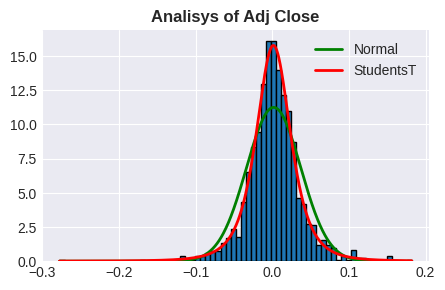

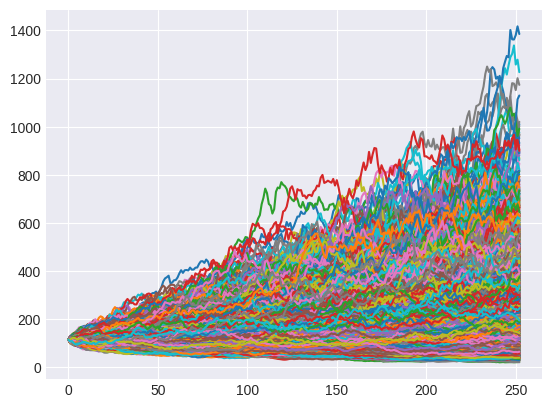

Expected price:  203.44


In [115]:
stock_valuation('AMD', '2017/01/01', '2022/12/31', 10000)

In [95]:
'2017/06/01'[9]

'1'